# BT4012 Project Group 7

## **Medical Provider Fraud**
In this notebook, we will examine provider fraud using data provided by Medicare. 

According to the US Government, the total Medicare spending increased exponentially due to frauds in Medicare claims. Healthcare (Provider) fraud is an organized crime which involves peers of providers, physicians, beneficiaries acting together to make fraudulent claims.

The link to the datasets can be found here: https://www.kaggle.com/datasets/rohitrox/healthcare-provider-fraud-detection-analysis

We have 4 types of data: Label data, Beneficiary data, Inpatient data and Outpatient data.

# Data Preprocesssing
Before building our models, we will first analyse the data and determine areas to preprocess.

In [34]:
# Import libraries
import warnings

warnings.filterwarnings("ignore")

import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

pd.set_option("display.max_columns", 500)

## 1. Data Extraction

We extract and combine different raw data tables into train and test tables.

### 1.1 Data Importing

In [35]:
# Import train and test data
beneficiary_test = pd.read_csv("./data/Test_Beneficiarydata-1542969243754.csv")
inpatient_test = pd.read_csv("./data/Test_Inpatientdata-1542969243754.csv")
outpatient_test = pd.read_csv("./data/Test_Outpatientdata-1542969243754.csv")
test = pd.read_csv("./data/Test-1542969243754.csv")

beneficiary_train = pd.read_csv("./data/Train_Beneficiarydata-1542865627584.csv")
inpatient_train = pd.read_csv("./data/Train_Inpatientdata-1542865627584.csv")
outpatient_train = pd.read_csv("./data/Train_Outpatientdata-1542865627584.csv")
train = pd.read_csv("./data/Train-1542865627584.csv")

In [36]:
# Beneficiary train data
beneficiary_train.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50


In [37]:
# Inpatient train data
inpatient_train.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [38]:
# Outpatient train data
outpatient_train.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [39]:
# Labeled train data
train.head(2)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes


### 1.2 Data Merging


In [40]:
# create binary columns to indicate Inpatient status (1)
inpatient_train['is_inpatient'] = 1
outpatient_train['is_inpatient'] = 0

inpatient_test['is_inpatient'] = 1
outpatient_test['is_inpatient'] = 0

In [41]:
# concat inpatient and outpatient datasets to form a single patient column
patient_train = pd.concat([inpatient_train, outpatient_train])

patient_test = pd.concat([inpatient_test, outpatient_test])

In [42]:
# left join with beneficiary data on BeneID
patient_train = pd.merge(patient_train, beneficiary_train, how='left', on='BeneID')

patient_test = pd.merge(patient_test, beneficiary_test, how='left', on='BeneID')

In [43]:
# left join with label on Provider
patient_train = pd.merge(patient_train, train, how='left', on='Provider')

patient_test = pd.merge(patient_test, test, how='left', on='Provider')

In [44]:
print(f"Shape of train data: {patient_train.shape}")
print(f"Shape of test data: {patient_test.shape}")
# Test data is not labelled

Shape of train data: (558211, 56)
Shape of test data: (135392, 55)


## 2. Feature Engineering

We relabel, encode and aggregate data as there are too many feature columns in our dataset, some of which are not very meaningful in raw data form.

### 2.1 Data Clarification
- Changing binary boolean features to 0/1 values (all Chronic Conditions and RenalDiseaseIndicator) 
- Replacing target label (`PotentialFraud`) to a binary value


In [45]:
# Replacing 2 with 0 for chronic conditions.

patient_train = patient_train.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

patient_train = patient_train.replace({'RenalDiseaseIndicator': 'Y'}, 1)
patient_train = patient_train.replace({'RenalDiseaseIndicator': '0'}, 0)

patient_test = patient_test.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

patient_test = patient_test.replace({'RenalDiseaseIndicator': 'Y'}, 1)
patient_test = patient_test.replace({'RenalDiseaseIndicator': '0'}, 0)

In [46]:
patient_train['PotentialFraud'] = patient_train['PotentialFraud'].replace({'Yes': 1, 'No': 0})

### 2.2 Feature Engineering
For Date Columns
- Create ClaimProcessedForDays from `ClaimStartDt` and `ClaimEndDt`
- Create Age, IsDead feature from `DOB` and `DOD`
- Create AdmitForDays from `AdmissionDT` and `DischargeDT`

In [47]:
date_cols= ['ClaimStartDt', 'ClaimEndDt', 'DOB', 'DOD', 'AdmissionDt', 'DischargeDt']
# Cast to Datetime Data Type
patient_train[date_cols] = patient_train[date_cols].apply(pd.to_datetime, format = '%Y-%m-%d', errors='ignore')
patient_test[date_cols] = patient_test[date_cols].apply(pd.to_datetime, format = '%Y-%m-%d', errors='ignore')

In [48]:
# For Train data
# Create 'ClaimProcessedForDays' indicating number of days the claim takes to process
patient_train['ClaimProcessedForDays'] = ((patient_train['ClaimEndDt'] - patient_train['ClaimStartDt']).dt.days)+1

# Create 'Age' indicating age of patient at latest day/DOD
patient_train['Age'] = round(((patient_train['DOD'] - patient_train['DOB']).dt.days)/365)
## For rows without DOD, we will calculate age of other benficiaries from the last DOD value (2009-12-01).
patient_train.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - patient_train['DOB']).dt.days)/365), inplace=True)

# Create 'isDead' with flag 1 means Dead and 0 means not Dead 
patient_train.loc[patient_train.DOD.isna(),'isDead']=0
patient_train.loc[patient_train.DOD.notna(),'isDead']=1

patient_train.loc[patient_train.DOD.isna(),'isDead']=0
patient_train.loc[patient_train.DOD.notna(),'isDead']=1

# Create 'AdmitForDays' indicating number of days patient was admitted in hospital (only for inpatient)
patient_train['AdmitForDays'] = ((patient_train['DischargeDt'] - patient_train['AdmissionDt']).dt.days)+1
patient_train['AdmitForDays'] = patient_train['AdmitForDays'].fillna(0) # for outpatient, default 0 days admitted


In [49]:
# For Test data
# Create 'ClaimProcessedForDays' indicating number of days the claim takes to process
patient_test['ClaimProcessedForDays'] = ((patient_test['ClaimEndDt'] - patient_test['ClaimStartDt']).dt.days)+1

# Create 'Age' indicating age of patient at latest day/DOD
patient_test['Age'] = round(((patient_test['DOD'] - patient_test['DOB']).dt.days)/365)
## For rows without DOD, we will calculate age of other benficiaries from the last DOD value (2009-12-01).
patient_test.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - patient_test['DOB']).dt.days)/365), inplace=True)

# Create 'isDead' with flag 1 means Dead and 0 means not Dead 
patient_test.loc[patient_test.DOD.isna(),'isDead']=0
patient_test.loc[patient_test.DOD.notna(),'isDead']=1

patient_test.loc[patient_test.DOD.isna(),'isDead']=0
patient_test.loc[patient_test.DOD.notna(),'isDead']=1

# Create 'AdmitForDays' indicating number of days patient was admitted in hospital (only for inpatient)
patient_test['AdmitForDays'] = ((patient_test['DischargeDt'] - patient_test['AdmissionDt']).dt.days)+1
patient_test['AdmitForDays'] = patient_test['AdmitForDays'].fillna(0) # for outpatient, default 0 days admitted

## Data Preprocessing


In [50]:
# trim 'ClmProcedureCode_6' column as it is completely filled with Nan values
trimmed_patient_train = patient_train.drop(columns=['ClmProcedureCode_6'])
trimmed_patient_test = patient_test.drop(columns=['ClmProcedureCode_6'])

### 3.1 Data Imputation
- Handling missing values in `DeductibleAmtPaid` and `DiagnosisGroupCode`

In [51]:
# For DeductibleAmtPaid, assign missing amount to be 0
trimmed_patient_train['DeductibleAmtPaid'].fillna(0, inplace=True)
trimmed_patient_test['DeductibleAmtPaid'].fillna(0, inplace=True)

In [52]:
# for DiagnosisGroupCode, assign a placeholder value of '000'
trimmed_patient_train['DiagnosisGroupCode'].fillna('000', inplace=True)
trimmed_patient_test['DiagnosisGroupCode'].fillna('000', inplace=True)

### 3.2 Categorical Encoding
- Categorical data (Race, Gender, State, County) are already categorically encoded

In [53]:
# Convert the columns to categorical data type
categorical_columns = ['Race', 'Gender', 'State', 'County']

trimmed_patient_train[categorical_columns] = trimmed_patient_train[categorical_columns].astype('category')
trimmed_patient_test[categorical_columns] = trimmed_patient_test[categorical_columns].astype('category')

### 3.3 Frequency Encoding
- Count encoding all the multi-label feature `diagnosis_codes`, `procedure_codes`, `physician_codes`
- All Nan values are encoded 0

In [54]:
# List of codes columns - for physicians, diagnosis and procedure
freq_encoding_cols = {
"Physician Codes" : ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'],

"Diagnosis Codes" : ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 
                   'ClmDiagnosisCode_4','ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 
                   'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10'],

"Procedure Codes" : ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 
                   'ClmProcedureCode_5'],

"Diagnosis Group Codes" : ['DiagnosisGroupCode']
}

In [55]:
# CountEncode each code group columns (Both Train and Test)
for k, code_cols in freq_encoding_cols.items():
    ec = ce.CountEncoder()
    # fit Encoder on stacked train data of each code group
    ec = ec.fit(trimmed_patient_train[code_cols].stack(dropna=True).astype('O'))
    # transform each column of the code group
    for col in code_cols:
        trimmed_patient_train[col + "_ce"] = ec.transform(trimmed_patient_train[col].rename(0))
        trimmed_patient_train[col + "_ce"] = trimmed_patient_train[col + "_ce"].astype('category')
        trimmed_patient_test[col + "_ce"] = ec.transform(trimmed_patient_test[col].rename(0))
        trimmed_patient_test[col + "_ce"] = trimmed_patient_test[col + "_ce"].astype('category')
    print(f"Complete encoding for {k}")

Complete encoding for Physician Codes
Complete encoding for Diagnosis Codes
Complete encoding for Procedure Codes
Complete encoding for Diagnosis Group Codes


## 4. Exploratory Data Analysis

We explore `PotentialFraud` Proportion of different Features in Train data.

### 4.1 Overall Proportion

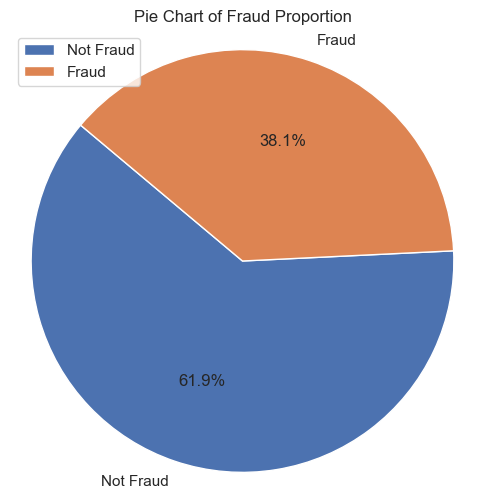

In [56]:
#@title Distribution of Fraud and non-Fraud

fraud_counts = patient_train['PotentialFraud'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Pie Chart of Fraud Proportion')
plt.legend()
plt.show()

### 4.2 Proportion by Categorical Features

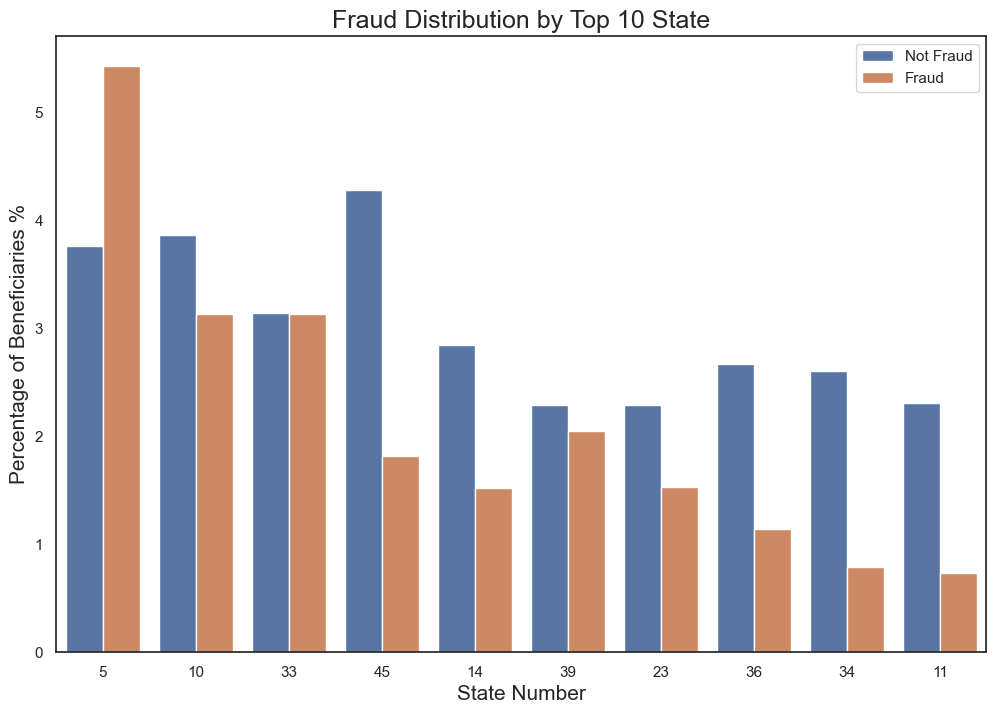

In [57]:
#@title Distribution of Frauds across top 10 States
sns.set(rc={'figure.figsize':(12,8)},style='white')
sns.countplot(x='State',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train['State'].value_counts().iloc[:10].index)

plt.title("Fraud Distribution by Top 10 State",fontsize=18)
plt.xlabel("State Number",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
plt.show()

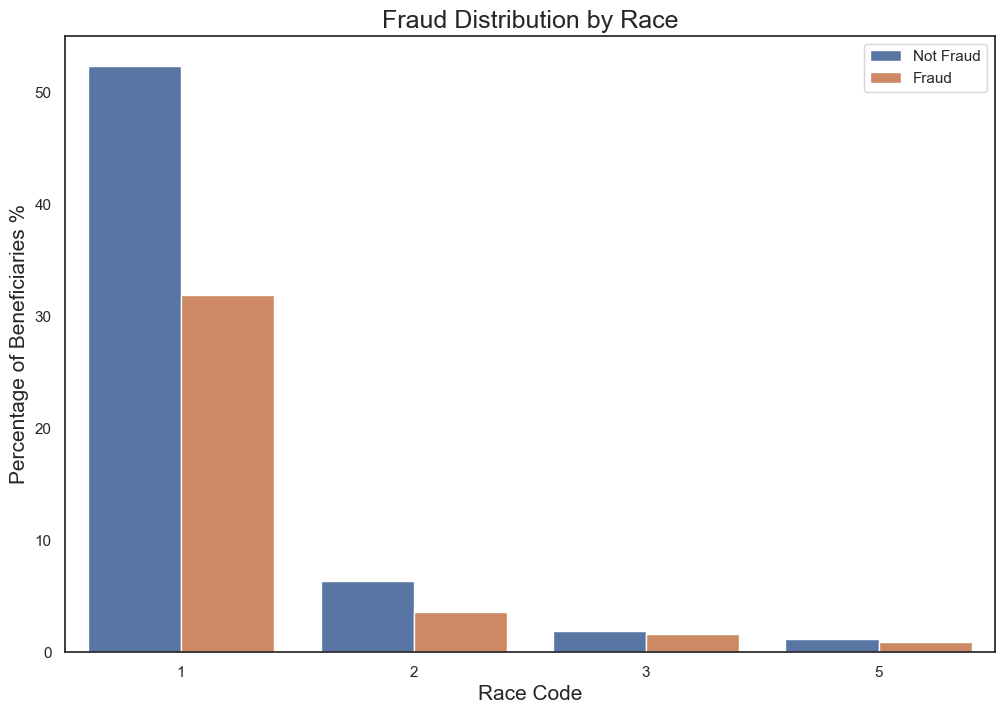

In [58]:
#@title Distribution of Race-wise beneficiaries
sns.set(rc={'figure.figsize':(12,8)},style='white')
sns.countplot(x='Race',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train['Race'].value_counts().iloc[:10].index)

plt.title("Fraud Distribution by Race",fontsize=18)
plt.xlabel("Race Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
plt.show()


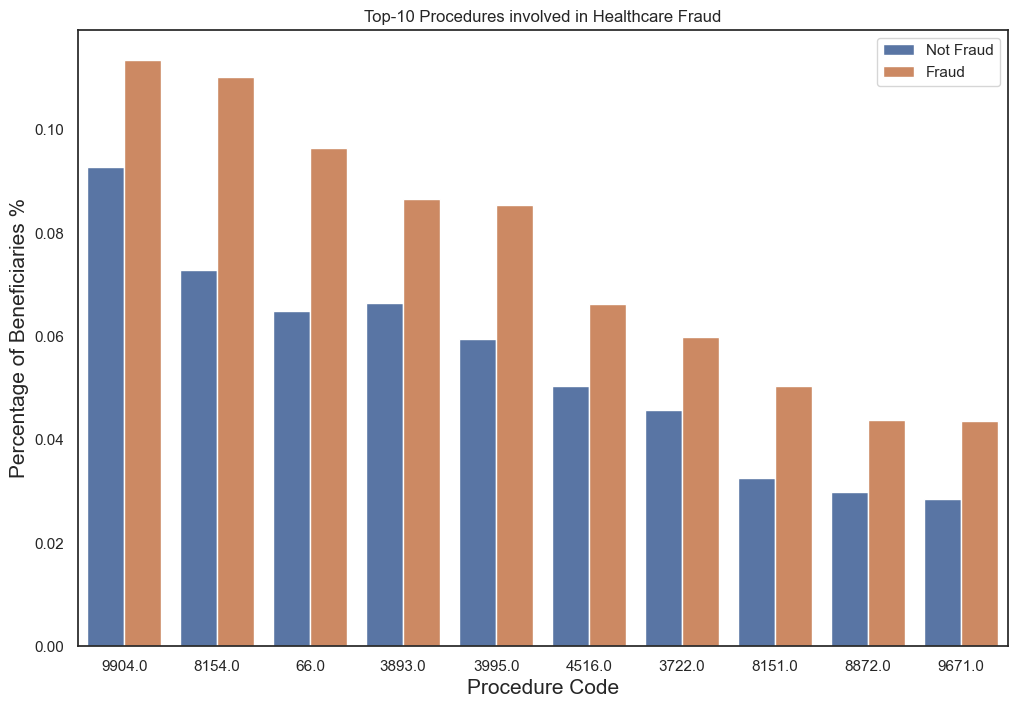

In [59]:
#@title Distribution of Fraud across top 10 Procedures

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train.ClmProcedureCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Procedures involved in Healthcare Fraud')
plt.xlabel("Procedure Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
    
plt.show()


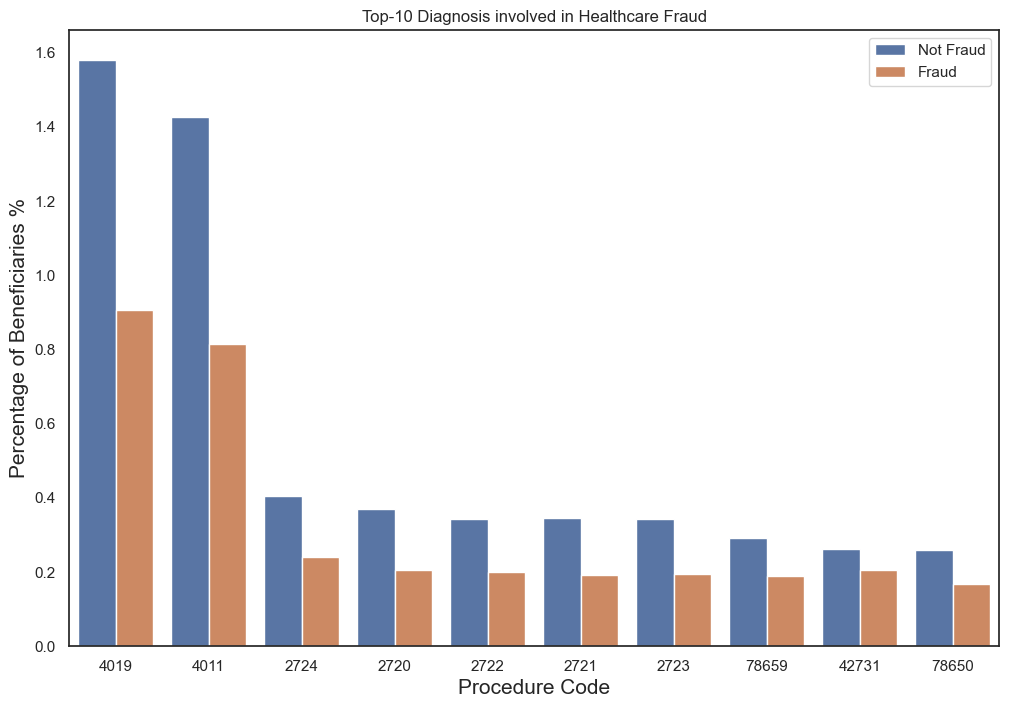

In [60]:
#@title Distribution of Fraud across top 10 Diagnosis

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmDiagnosisCode_1',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train.ClmDiagnosisCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Diagnosis involved in Healthcare Fraud')
plt.xlabel("Procedure Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
    
plt.show()

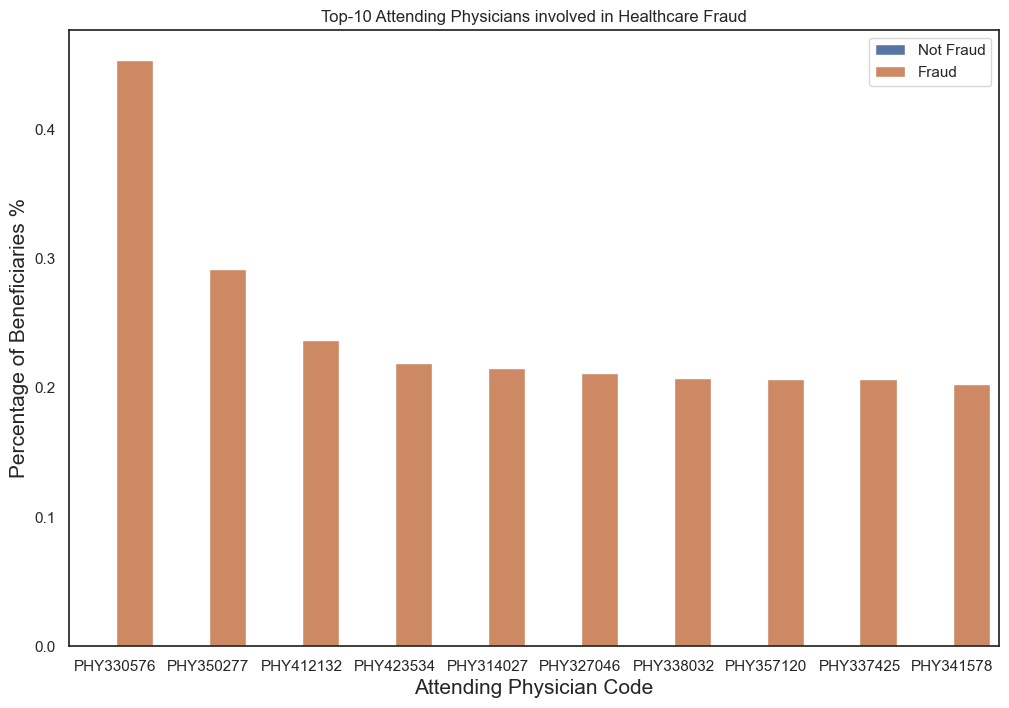

In [61]:
#@title Distribution of Fraud across Attending Physicians

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train.AttendingPhysician.value_counts().iloc[:10].index)

plt.title('Top-10 Attending Physicians involved in Healthcare Fraud')
plt.xlabel("Attending Physician Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
    
plt.show()

### 4.3 Distribution of Numerical Features

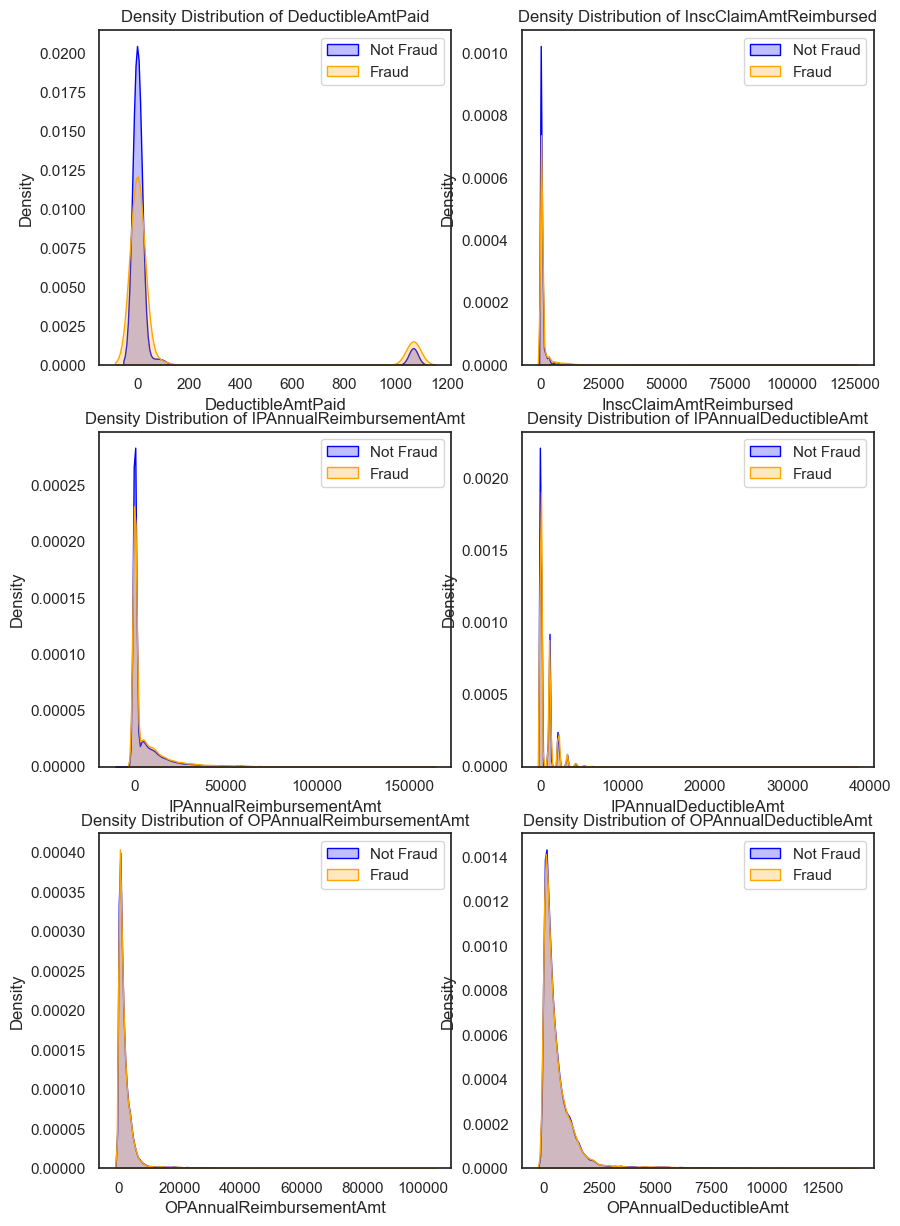

In [62]:
#@title Density Distribution of Numerical features
selected_col =  ['DeductibleAmtPaid', 'InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
            'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']

num_rows = (len(selected_col) + 3) // 2  # Adjust based on the desired layout
num_cols = 2

plt.figure(figsize=(10, 5*num_rows))
for idx, column in enumerate(selected_col, start=1):
    plt.subplot(num_rows, num_cols, idx)
    sns.kdeplot(patient_train[patient_train['PotentialFraud'] == 0][column], fill=True, color="blue", label="Not Fraud")
    sns.kdeplot(patient_train[patient_train['PotentialFraud'] == 1][column], fill=True, color="orange", label="Fraud")
    plt.title(f"Density Distribution of {column}")
    plt.legend()

plt.show()

#### Missing OperatingPhysician --  check that all missing rows are associated with outpatient

Assumption: Patients who dont stay in the hospital do not require surgery, hence is Missing at Random

In [63]:
patient_train[patient_train['OperatingPhysician'].isna()]['is_inpatient'].unique()

array([1, 0], dtype=int64)

Operating Physicians are present for both inpatient and outpatient. Maybe Operating Physicians can operate on outpatients too. Check distribution of missing vs non missing Operating Physicians on inpatient vs outpatients

<Axes: xlabel='OperatingPhysician_temp', ylabel='count'>

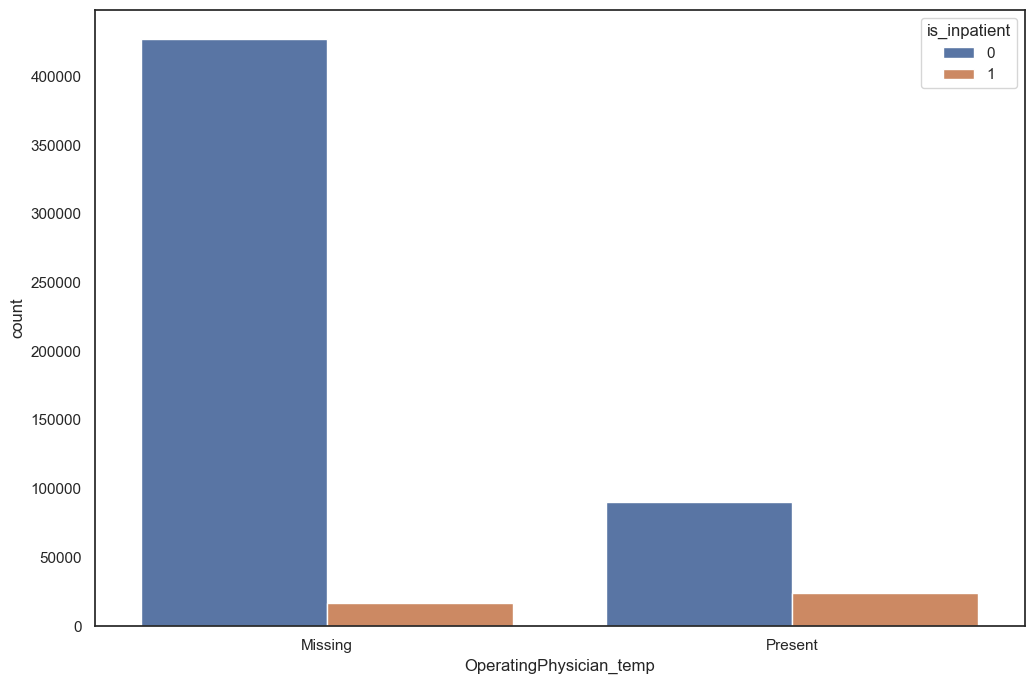

In [64]:
patient_train['OperatingPhysician_temp'] = patient_train['OperatingPhysician'].apply(lambda x: "Missing" if pd.isnull(x) else "Present")
sns.countplot(data=patient_train, x='OperatingPhysician_temp', hue='is_inpatient')

## 5. Data Uploading

### 5.1 Obtain relevant columns
- Keep newly engineered features, categorical features, encoded features and scaled numerical features
- Ignore date columns, codes columns
- Upload to X_train, y_train and X_test json file

In [65]:
relevant_cols = ['BeneID', 'ClaimID', 'Provider',
       'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'is_inpatient', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'isDead',
       'AdmitForDays', 'ClaimProcessedForDays', 'AttendingPhysician_ce',
       'OperatingPhysician_ce', 'OtherPhysician_ce',
       'ClmAdmitDiagnosisCode_ce', 'ClmDiagnosisCode_1_ce',
       'ClmDiagnosisCode_2_ce', 'ClmDiagnosisCode_3_ce',
       'ClmDiagnosisCode_4_ce', 'ClmDiagnosisCode_5_ce',
       'ClmDiagnosisCode_6_ce', 'ClmDiagnosisCode_7_ce',
       'ClmDiagnosisCode_8_ce', 'ClmDiagnosisCode_9_ce',
       'ClmDiagnosisCode_10_ce', 'ClmProcedureCode_1_ce',
       'ClmProcedureCode_2_ce', 'ClmProcedureCode_3_ce',
       'ClmProcedureCode_4_ce', 'ClmProcedureCode_5_ce', 'DiagnosisGroupCode_ce']
target_col = ['BeneID', 'Provider', 'PotentialFraud']

In [66]:
# X_train, y_train, and X_test
X_train = trimmed_patient_train[relevant_cols]
y_train = trimmed_patient_train[target_col]
X_test = trimmed_patient_test[relevant_cols]

num_rows = X_train.shape[0]
split_index = num_rows // 2

# Split the DataFrame into two equal parts
X_train1 = X_train.iloc[:split_index]
X_train2 = X_train.iloc[split_index:]

# Save X_train, y_train, and X_test to csv files
X_train1.to_csv('X_train1.csv', index=False)
X_train2.to_csv('X_train2.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)